In [2]:
import re,sys,os,numpy as np, pandas as pd
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import cv2
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, Convolution2D, Activation
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import wandb
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn import datasets, neighbors
from mlxtend.plotting import plot_decision_regions
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
import seaborn as sn
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)




In [3]:
def get_data(file):

    images = []
    labels = []
    
    img_path= "C:/Users/Manasa Mananjaya/images"
    f=open(file,"r")
    
    for line in f:
        
        filename, label = line.split(' ')
        filename=filename[11:]
        path=img_path +"/"+ filename
        img=cv2.imread(path)
        img = cv2.resize(img, (32, 32))
        images.append(img)
        labels.append(int(label))
            
    images = np.array(images)    
    labels = np.array(labels)
    return images,labels
      
      
def import_data():
    
    train_data, train_labels= get_data("train.txt")  #3746
    val_data, val_labels= get_data("val.txt")      #1640
    test_data, test_labels= get_data("test.txt")    #1305
    
    return train_data,train_labels,val_data,val_labels,test_data,test_labels




KNN Accuracy= 84.82758620689656


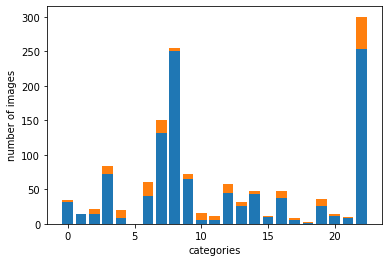

In [4]:
def knn():
    
    model = KNeighborsClassifier(n_neighbors=3)

    train_data,train_labels,val_data,val_labels,test_data,test_labels=import_data()

    train_data=train_data.reshape(train_data.shape[0],-1)
    test_data=test_data.reshape(test_data.shape[0],-1)

    model.fit(train_data,train_labels)
    test_acc = model.score(test_data,test_labels)
    y_pred = model.predict(test_data)
        
    print("KNN Accuracy=",test_acc*100)
    matrix = confusion_matrix(test_labels, y_pred)
    
    data1=[]
    data2=[]
    for i in range(23):
        total=0
        for j in range(23):
            
            if i==j:
                data1.append(matrix[i][j])
            elif matrix[i][j]!=0:
                total=total+matrix[i][j]
        data2.append(total)
    
    plt.bar(range(len(data1)), data1)
    plt.bar(range(len(data2)), data2, bottom=data1)
    plt.xlabel('categories')
    plt.ylabel('number of images')
    plt.show()
    
knn()

CNN Accuracy= 90.88122844696045


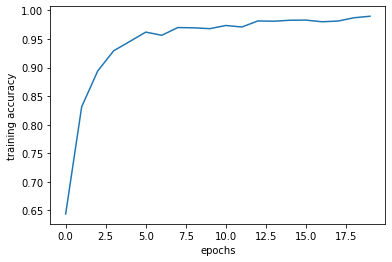

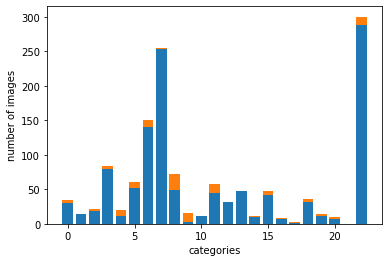

In [5]:
def cnn():
     
    train_data,train_labels,val_data,val_labels,test_data,test_labels=import_data()
    
    train_data = train_data.reshape(train_data.shape[0], 32, 32, 3)
    test_data = test_data.reshape(test_data.shape[0], 32, 32, 3)
   
    model=Sequential()
    
    model.add(Conv2D(16, kernel_size=(3, 3), activation='relu',padding='same', input_shape=(32,32,3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu',padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu',padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(128, kernel_size=(3, 3), activation='relu',padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dense(25, activation='softmax'))

    model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
    history= model.fit(train_data,train_labels,epochs=20,batch_size=100,verbose=0,validation_data=(val_data, val_labels))
    
    predictions = model.predict(test_data)
    
    # predicted labels
    y_pred = np.argmax(predictions, axis=1)
    
    test_loss, test_acc = model.evaluate(test_data,test_labels,verbose=0)
    
    
    print("CNN Accuracy=",test_acc*100)

    plt.plot(history.history['accuracy'])
    plt.xlabel('epochs')
    plt.ylabel('training accuracy')
    plt.show()
    
    matrix = confusion_matrix(test_labels, y_pred)
    
    data1=[]
    data2=[]
    for i in range(23):
        total=0
        for j in range(23):
            
            if i==j:
                data1.append(matrix[i][j])
            elif matrix[i][j]!=0:
                total=total+matrix[i][j]
        data2.append(total)
    
    plt.bar(range(len(data1)), data1)
    plt.bar(range(len(data2)), data2, bottom=data1)
    plt.xlabel('categories')
    plt.ylabel('number of images')
    plt.show()
    
    
cnn()

Naive Bayes Accuracy= 65.28735632183908


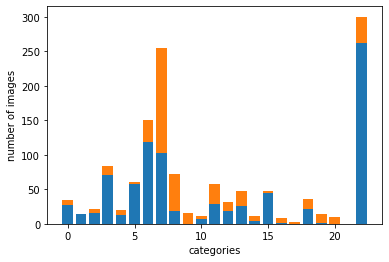

In [6]:
def naive_bayes():

    train_data,train_labels,val_data,val_labels,test_data,test_labels=import_data()  
    train_data=train_data.reshape(train_data.shape[0],-1)
    test_data=test_data.reshape(test_data.shape[0],-1)
    
    model = GaussianNB()
    model.fit(train_data,train_labels)
    y_pred = model.predict(test_data)
    test_acc=accuracy_score(test_labels, y_pred)
    print("Naive Bayes Accuracy=",test_acc*100)
    
    matrix = confusion_matrix(test_labels, y_pred)
    
    data1=[]
    data2=[]
    for i in range(23):
        total=0
        for j in range(23):
            
            if i==j:
                data1.append(matrix[i][j])
            elif matrix[i][j]>0:
                total=total+matrix[i][j]
        data2.append(total)
    
    plt.bar(range(len(data1)), data1)
    plt.bar(range(len(data2)), data2, bottom=data1)
    plt.xlabel('categories')
    plt.ylabel('number of images')
    plt.show()
    
naive_bayes()
    

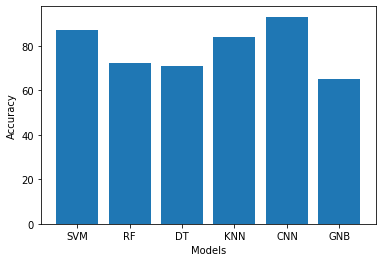

In [7]:
data1=[87,72,71,84,93,65]

plt.bar(['SVM','RF','DT','KNN','CNN','GNB'], data1)

plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.show()